## Importing Libraries

In [38]:
import numpy as np
import pandas as pd
import scipy 
from scipy.spatial.distance import squareform, pdist
from scipy import stats
import plotly.express as px
import matplotlib.pyplot as plt

__Example 12.1.1__ (Crime Data) Consider a set of crime data reported in six different US states that includes attributes ‘Murder rate’, ‘Assault rate’, ‘Rape rate’, and ‘Urban population’. The table shows crime rates per 100,000 residents and the variable ‘Urban Pop’ represents the percent of the population living in urban areas in the given state.

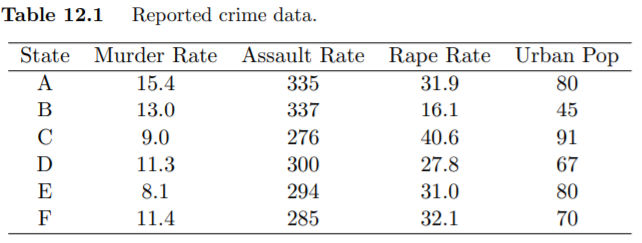

Using Python, find all pairwise Euclidean distances and plot resulting distances in a network graph.

In [17]:
# Data preperation
Murder = [15.4,13,9,11.3,8.1,11.4]
Assault = [335,337,276,300,294,285]
Rape = [31.9,16.1,40.6,27.8,31,32.1]
Urban = [80,45,91,67,80,70]

# combining the data into a data table
crime_data = pd.DataFrame({'Murder': Murder, 'Assault': Assault, 'Rape': Rape, 'Urban': Urban}, index=['A', 'B', 'C', 'D', 'E', 'F'])
crime_data

,Murder,Assault,Rape,Urban
A,15.4,335,31.9,80
B,13.0,337,16.1,45
C,9.0,276,40.6,91
D,11.3,300,27.8,67
E,8.1,294,31.0,80
F,11.4,285,32.1,70


In [41]:
crime_dist = pd.DataFrame(squareform(pdist(crime_data.iloc[:, 1:])), columns=crime_data.index, index=crime_data.index)
crime_dist

,A,B,C,D,E,F
A,0.000000,38.453088,60.643961,37.560751,41.009877,50.990587
B,38.453088,0.000000,80.232475,44.608183,57.410887,59.874870
C,60.643961,80.232475,0.000000,36.274509,23.176712,24.377243
D,37.560751,44.608183,36.274509,0.000000,14.671060,15.889934
E,41.009877,57.410887,23.176712,14.671060,0.000000,13.498518
F,50.990587,59.874870,24.377243,15.889934,13.498518,0.000000


In [514]:
from itertools import combinations, permutations

comb_list = list(combinations(crime_dist.columns, 2))  # make a list like [('A', 'B'), ('A', 'C')...] for all the pairwise combinations
from_list = [c[0] for c in comb_list]  # grabbing the 'from' nodes
to_list = [c[1] for c in comb_list]  # grabbing the 'to' nodes
values = np.array([crime_dist.loc[[c[0]], [c[1]]].values for c in comb_list]).flatten()  # grabbing the distance values

print("COMBINATIONS LIST:", comb_list)
print()
print("VALUES/DISTANCES:", values)

COMBINATIONS LIST: [('A', 'B'), ('A', 'C'), ('A', 'D'), ('A', 'E'), ('A', 'F'), ('B', 'C'), ('B', 'D'), ('B', 'E'), ('B', 'F'), ('C', 'D'), ('C', 'E'), ('C', 'F'), ('D', 'E'), ('D', 'F'), ('E', 'F')]

VALUES/DISTANCES: [38.4530883  60.64396095 37.56075079 41.00987686 50.99058737 80.23247472
 44.60818311 57.41088747 59.87486952 36.27450896 23.17671245 24.37724349
 14.67105995 15.88993392 13.49851844]


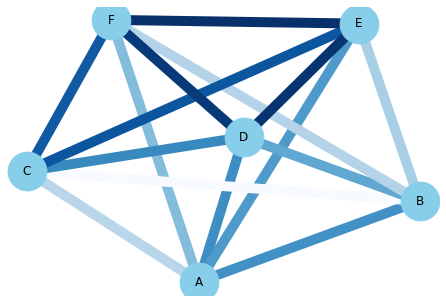

In [160]:
import networkx as nx

# Build a dataframe with your connections
df = pd.DataFrame({'from': from_list, 'to': to_list, 'value': values})
 
# Build your graph
G=nx.from_pandas_edgelist(df, 'from', 'to', create_using=nx.Graph())
 
# Custom the nodes: # THE DARKER THE NODES, THE CLOSER THEY ARE
nx.draw(G, with_labels=True, node_color='skyblue', node_size=1500, edge_color=df['value'], width=10.0, edge_cmap=plt.cm.Blues_r)

In [236]:
from scipy.cluster.hierarchy import dendrogram, linkage

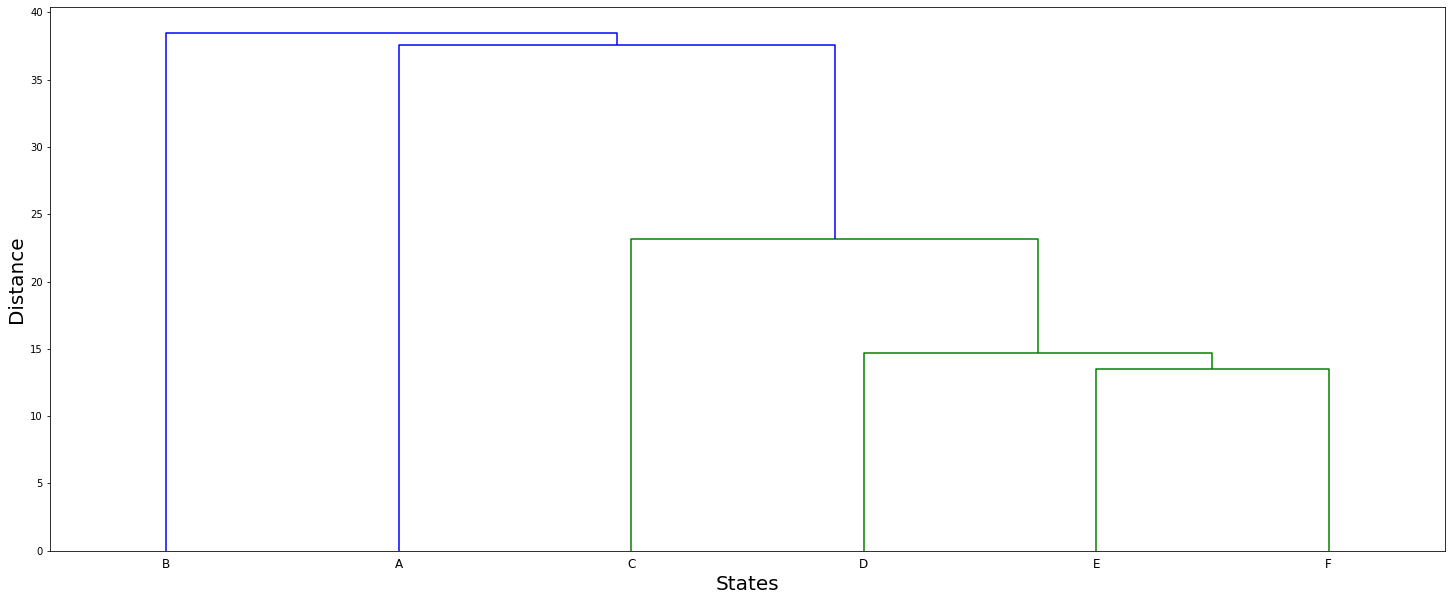

In [198]:
cf = pdist(crime_data.iloc[:, 1:])
Z = linkage(cf, 'single')

# plotting the dendogram
fig = plt.figure(figsize=(25, 10))
dn = dendrogram(Z, labels=crime_dist.columns)
plt.xlabel("States", fontsize=20)
plt.ylabel("Distance", fontsize=20)
plt.show()

__Example 12.2.4__ (Face clusters) In this example, we consider a two-dimensional data set that mimics a
face like structure. There are six apparent clusters in this data set. Python is used to obtain single, complete,
and average linkage method based clusters.

In [207]:
# loading in sample face data 
face_df = pd.read_excel('face_data.xlsx', names=['X', 'Y', 'Membership'])
face_df

,X,Y,Membership
0,-1.274535,1.502388,1
1,1.729831,3.035770,1
2,-0.546138,0.378285,1
3,2.298104,5.264891,1
4,2.642804,7.108703,1
...,...,...,...
395,-2.361403,16.245208,2
396,-1.768668,16.868054,2
397,-4.500000,25.000000,6
398,4.500000,25.000000,6


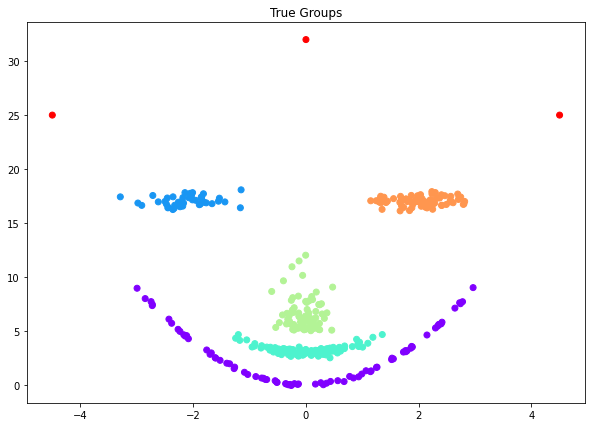

In [259]:
plt.figure(figsize=(10, 7))
plt.scatter(face_df.X, face_df.Y, c=face_df.Membership, cmap='rainbow')
plt.title("True Groups")
plt.show()

In [247]:
from sklearn.cluster import AgglomerativeClustering

comp_cluster = AgglomerativeClustering(n_clusters=6, affinity='euclidean', linkage='complete')
sing_cluster = AgglomerativeClustering(n_clusters=6, affinity='euclidean', linkage='single')
avg_cluster = AgglomerativeClustering(n_clusters=6, affinity='euclidean', linkage='average')

comp_cluster.fit_predict(face_df)
sing_cluster.fit_predict(face_df)
avg_cluster.fit_predict(face_df)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

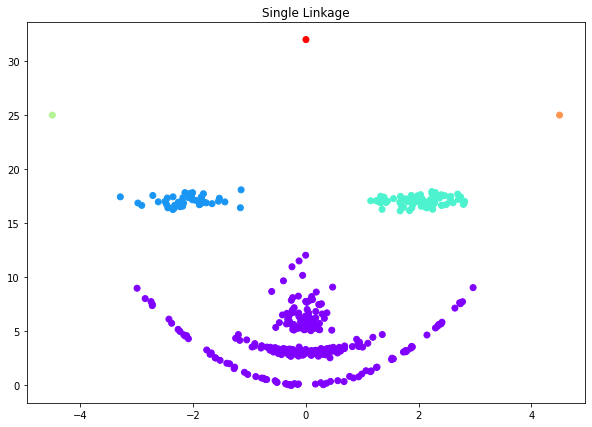

In [250]:
plt.figure(figsize=(10, 7))
plt.scatter(face_df.X, face_df.Y, c=sing_cluster.labels_, cmap='rainbow')
plt.title("Single Linkage")
plt.show()

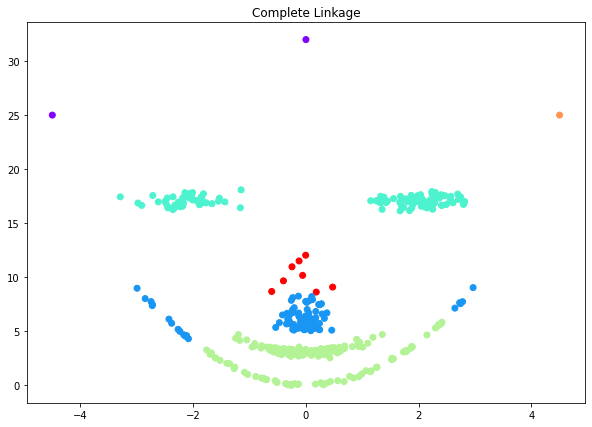

In [253]:
plt.figure(figsize=(10, 7))
plt.scatter(face_df.X, face_df.Y, c=comp_cluster.labels_, cmap='rainbow')
plt.title("Complete Linkage")
plt.show()

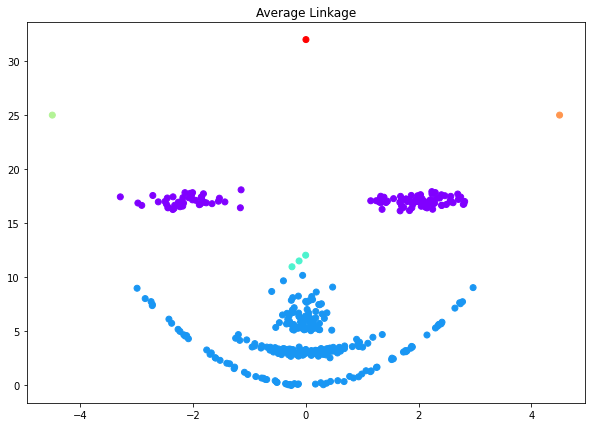

In [254]:
plt.figure(figsize=(10, 7))
plt.scatter(face_df.X, face_df.Y, c=avg_cluster.labels_, cmap='rainbow')
plt.title("Average Linkage")
plt.show()

__Example 12.2.5__ (Face clusters) Apply Ward’s clustering method for the data in Example 12.2.4 and discuss its results.

In [265]:
ward_cluster = AgglomerativeClustering(n_clusters=6, affinity='euclidean', linkage='ward')
ward_cluster.fit_predict(face_df)

array([5, 2, 5, 0, 0, 0, 5, 0, 5, 5, 0, 5, 5, 5, 0, 0, 5, 0, 5, 0, 0, 5,
       5, 0, 5, 5, 5, 5, 5, 0, 0, 0, 5, 2, 0, 5, 2, 5, 5, 5, 0, 5, 5, 5,
       0, 0, 5, 5, 5, 0, 0, 5, 2, 0, 5, 5, 0, 2, 0, 5, 5, 0, 5, 5, 2, 5,
       2, 2, 2, 5, 2, 5, 5, 0, 5, 5, 5, 5, 5, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,

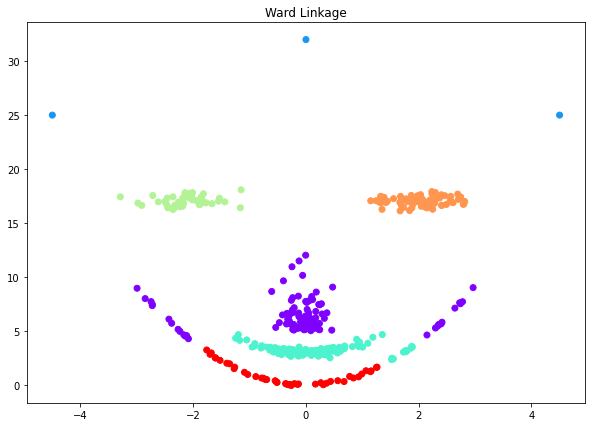

In [268]:
plt.figure(figsize=(10, 7))
plt.scatter(face_df.X, face_df.Y, c=ward_cluster.labels_, cmap='rainbow')
plt.title("Ward Linkage")
plt.show()

__Example 12.3.1__ Consider a two-dimensional data set consists of seven objects labeled A−G as shown in Table 12.2. We suppose that these seven objects belong to two distinct clusters (K = 2). Use the K-means method to cluster these seven objects

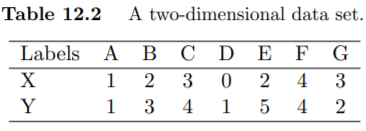

In [297]:
# Prepare data
X = pd.Series([1,2,3,0,2,4,3])
Y = pd.Series([1,3,4,1,5,4,2])

# storing data into a pandas dataframe
data = pd.concat([X, Y], axis=1)
data.columns = ['X', 'Y']
data.index = ['A', 'B', 'C', 'D', 'E', 'F', 'G']
data

,X,Y
A,1,1
B,2,3
C,3,4
D,0,1
E,2,5
F,4,4
G,3,2


In [298]:
from sklearn.cluster import KMeans

In [303]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [301]:
# the centroids 
kmeans.cluster_centers_

array([[2.8, 3.6],
       [0.5, 1. ]])

In [306]:
# clustering vector
kmeans.labels_

array([1, 0, 0, 1, 0, 0, 0])

In [310]:
# total sum of squared error for each cluster 
kmeans.inertia_

8.5

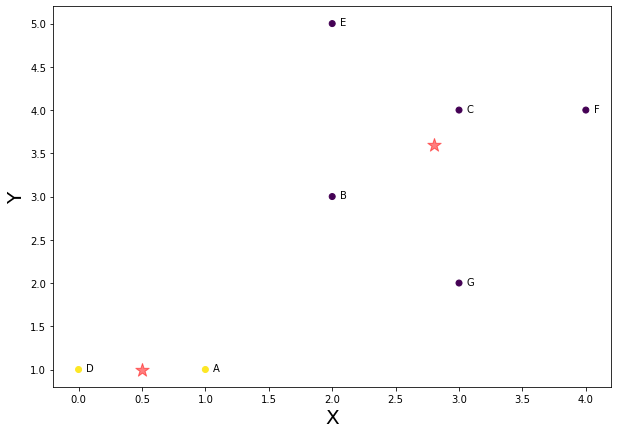

In [350]:
# To plot above K-means clusters
X_data = data.iloc[:, 0]
Y_data = data.iloc[:, 1]

plt.figure(figsize=(10, 7))
plt.scatter(X_data, Y_data, c=kmeans.labels_, cmap='viridis')
plt.xlabel('X', fontsize=20)
plt.ylabel('Y', fontsize=20)

# labeling each point
for xs, ys, label in zip(X_data, Y_data, ['A', 'B', 'C', 'D', 'E', 'F', 'G']):
    plt.annotate(s=label, 
                 xy=(xs, ys), 
                 textcoords="offset points",  # how to position the text
                 xytext=(11,-2),  # distance from text to points (x,y)
                 ha='center')  # horizontal alignment can be left, right or center
    


centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='*', s=200, alpha=0.5);

__Example 12.4.2__ We reconsider the face clustering discussed in Example 12.2.4 and apply the DBSCAN algorithm using Python.

In [352]:
from sklearn.cluster import DBSCAN

In [357]:
dbs = DBSCAN(eps=0.5, min_samples=5)
data = pd.concat([face_df.iloc[:, 0], face_df.iloc[:, 1] / 2.5], axis=1)
dbs.fit(data)

DBSCAN(algorithm='auto', eps=0.5, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=5, n_jobs=None, p=None)

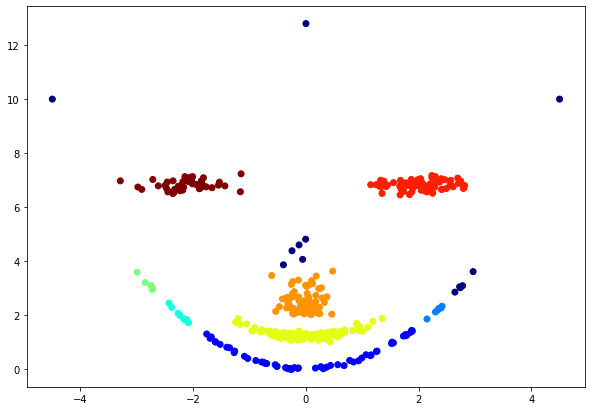

In [366]:
plt.figure(figsize=(10, 7))
plt.scatter(data.X, data.Y, c=dbs.labels_, cmap='jet')
plt.show()

__Example 12.5.1__ (Stiffness Measurements) In this example we consider three stiffness measurements ($X_1, X_2, X_3$) measured from 75 different boards. Observations for the first 13 boards are shown in Table 12.3, and the complete data set is available on the website: www.wiley.com/college/gupta/statistics2e. Apply the model based clustering algorithm, with covariance structures that are shown in Table 12.5.1 in the Text, and discuss their appropriateness.

In [371]:
# loading in the stiffness data
stiff_df = pd.read_excel('stiffness_data.xlsx')
stiff_df

,Board No,X1,X2,X3
0,1,1084,977,958
1,2,1059,1118,845
2,3,1017,973,994
3,4,956,1053,1027
4,5,992,823,1174
...,...,...,...,...
70,71,1050,1129,971
71,72,935,1110,1060
72,73,1070,1171,877
73,74,1073,1198,1185


In [385]:
from sklearn.mixture import GaussianMixture as GMM

In [512]:
plt.style.use('seaborn')

In [520]:
comb_list = list(permutations(stiff_df.columns[1:], 2))
comb_list = [[x[0], x[1]] for x in comb_list]
comb_list

[['X1', 'X2'],
 ['X1', 'X3'],
 ['X2', 'X1'],
 ['X2', 'X3'],
 ['X3', 'X1'],
 ['X3', 'X2']]

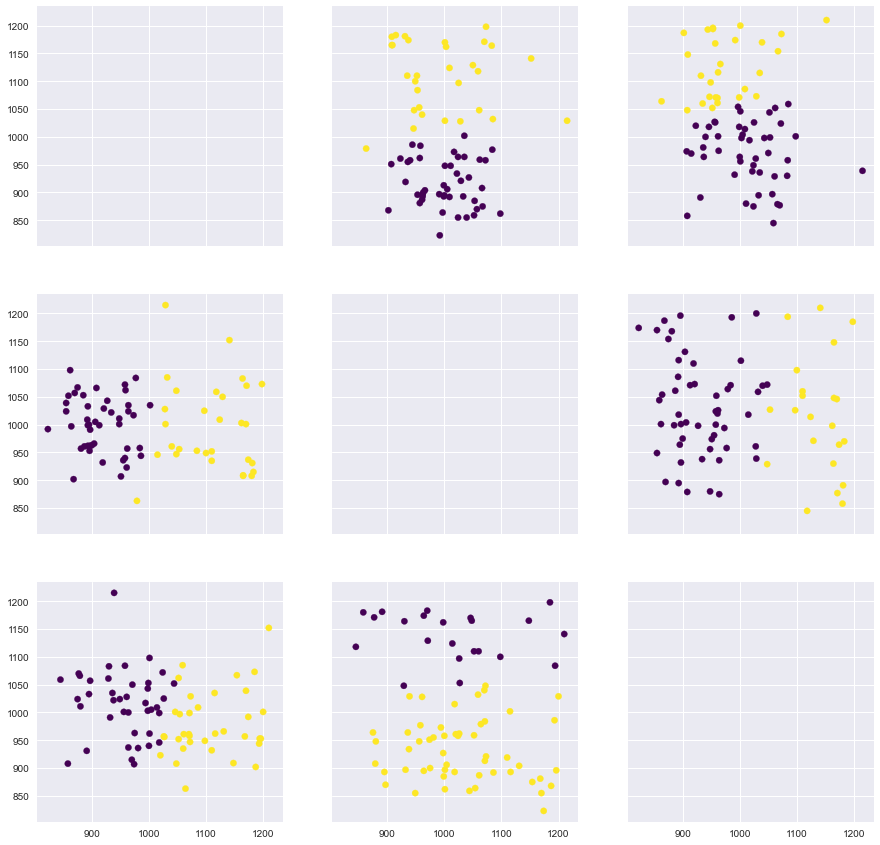

In [533]:
fig, axs = plt.subplots(nrows=3, ncols=3, sharex=True, sharey=True, figsize=(15,15))

for n, c in enumerate(comb_list):
    row_num = int(c[0][1]) - 1
    col_num = int(c[1][1]) - 1

    X = stiff_df[c]
    gmm = GMM(n_components=2, covariance_type='spherical').fit(X)
    labels = gmm.predict(X)
    axs[row_num, col_num].scatter(X.iloc[:, 0], X.iloc[:, 1], c=labels, s=40, cmap='viridis')
    

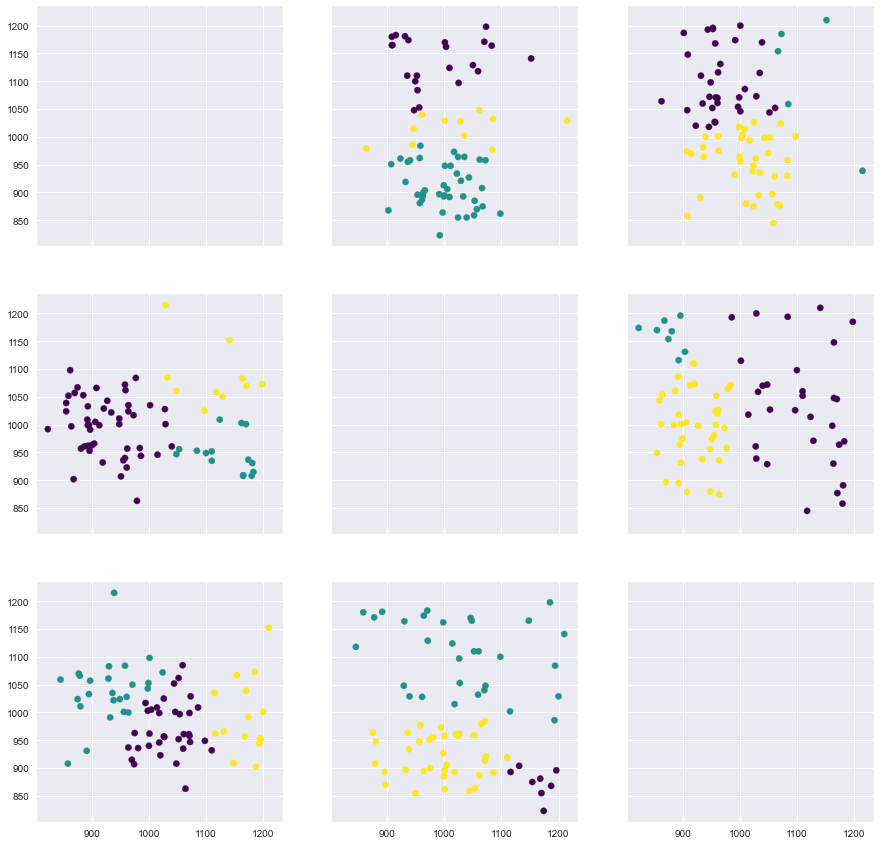

In [534]:
fig, axs = plt.subplots(nrows=3, ncols=3, sharex=True, sharey=True, figsize=(15,15))

for n, c in enumerate(comb_list):
    row_num = int(c[0][1]) - 1
    col_num = int(c[1][1]) - 1

    X = stiff_df[c]
    gmm = GMM(n_components=3, covariance_type='spherical').fit(X)
    labels = gmm.predict(X)
    axs[row_num, col_num].scatter(X.iloc[:, 0], X.iloc[:, 1], c=labels, s=40, cmap='viridis')